In [1]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np

In [2]:
df=pd.read_csv('Raw_First_Value.csv')

#피쳐 변수 설정
feature_names= ['obp', 'slg', 'ba', 'era','whip']

#X변수 설정
dfX0 = pd.DataFrame(df, columns=feature_names)
#y변수 설정
dfy = pd.DataFrame(df, columns=["pov"] )



In [3]:
df.tail()

,team,year,month,pov,obp,slg,ba,era,whip
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40
533,10,2022,5,0.385,0.318,0.387,0.251,6.51,1.67


In [4]:
df.columns

Index(['team', 'year', 'month', 'pov', 'obp', 'slg', 'ba', 'era', 'whip'], dtype='object')

In [5]:
#회귀분석
model_baseball = sm.OLS(dfy, dfX0)
result_baseball_ols = model_baseball.fit()
print(result_baseball_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pov   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1898.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                        0.00
Time:                        18:46:58   Log-Likelihood:                          367.64
No. Observations:                 534   AIC:                                     -725.3
Df Residuals:                     529   BIC:                                     -703.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
this_year_score=pd.DataFrame( pd.read_csv('2022yearcumul01.csv') )

In [7]:
this_year_score = this_year_score.drop(['이름'], axis=1)

In [9]:
pov22=[]
pov22_pred=[]
pov22_team=[]
for idx, row in this_year_score.iterrows():
    
    a= result_baseball_ols.predict(     row[ ['OBP','SLG','BA','ERA','WHIP' ]]    )
    print('예측값: ', round( a[0],3), end='    ')
    pov22_pred.append(round( a[0],3))
    b= this_year_score['POV'][idx]
    print('실제값: ',b)
    pov22.append(b)
    c=row['team']
    print(c)
    pov22_team.append(c)

예측값:  0.567    실제값:  0.542
9.0
예측값:  0.553    실제값:  0.567
4.0
예측값:  0.539    실제값:  0.6
5.0
예측값:  0.544    실제값:  0.661
6.0
예측값:  0.468    실제값:  0.483
2.0
예측값:  0.513    실제값:  0.475
1.0
예측값:  0.487    실제값:  0.383
7.0
예측값:  0.472    실제값:  0.483
3.0
예측값:  0.346    실제값:  0.361
10.0
예측값:  0.448    실제값:  0.448
8.0


In [10]:
pov22,pov22_pred

([0.542, 0.567, 0.6, 0.661, 0.483, 0.475, 0.383, 0.483, 0.361, 0.448],
 [0.567, 0.553, 0.539, 0.544, 0.468, 0.513, 0.487, 0.472, 0.346, 0.448])

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline
from matplotlib import rc 
rc('font', family='Malgun Gothic')

In [13]:
from sklearn.model_selection import train_test_split
X=dfX0
y=dfy

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [21]:
model_baseball_no_cost = sm.OLS(y_train, X_train)
result_no_cost = model_baseball_no_cost.fit()
reg=result_no_cost

In [22]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test=reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Train Data: ', rmse_test)

RMSE of Train Data:  0.12342790665883001
RMSE of Train Data:  0.11472489524327088


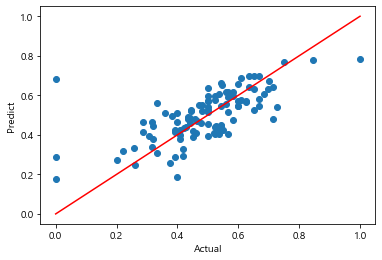

In [23]:
plt.scatter(y_test, pred_test )
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0, 1], [0, 1], 'r')


위의 모델은 실제값 0부근에서 유독 높은 예측을 하는 경향이 있다.... 아무래도 게임 경기가 매우 적은 달 때문인듯하다


In [188]:
from sklearn.model_selection import train_test_split

rs=RobustScaler()

dfX_rs= rs.fit_transform(dfX)
X=dfX_rs
y=dfy

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=13)

reg=LinearRegression()
reg.fit(X_train, y_train)
rs_reg_model = reg.fit(X_train, y_train)
pred_tr = reg.predict(X_train)
pred_test=reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Train Data: ', rmse_test)

RMSE of Train Data:  0.12254116302401723
RMSE of Train Data:  0.11931038371115013
